In [2]:
import pandas as pd
import sqlalchemy
import sqlite3

from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd
import re
import time
import sys
from datetime import datetime
from datetime import date

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#connect with database

con=sqlite3.connect("database.sqlite")

from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

params = {
    'host': 'localhost',
    'user': 'postgres',
    'port': 5432,
    'password':****
}



### Connect and create database, disconnect, and reconnect to the right database
connection = connect(**params, dbname='soccer')
connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
connection.close()





connection = connect(**params, dbname='soccer')
cursor = connection.cursor()
cursor.execute("SELECT * FROM Player;")
player=cursor.fetchall()
player=pd.DataFrame(player)
player

In [3]:
df2=pd.read_csv("project33.csv")

In [4]:

df2.drop("date_x",axis=1,inplace=True)
df2.drop("date_y",axis=1,inplace=True)


In [10]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [42]:
df_stats=pd.DataFrame(df2)
selected_columns=df2[["name","name","overall_rating","potential","short_passing","long_passing","marking","vision","ball_control","aggression","standing_tackle","shot_power","dribbling","reactions",'finishing',"heading_accuracy","interceptions"]]

In [43]:
df_stats21=selected_columns.copy()
df_stats21

,name,name,overall_rating,potential,short_passing,long_passing,marking,vision,ball_control,aggression,standing_tackle,shot_power,dribbling,reactions,finishing,heading_accuracy,interceptions
0,Belgium Jupiler League,Belgium Jupiler League,64.0,64.0,65.0,60.0,64.0,57.0,60.0,72.0,65.0,67.0,50.0,63.0,37.0,65.0,64.0
1,Belgium Jupiler League,Belgium Jupiler League,64.0,68.0,55.0,56.0,63.0,50.0,56.0,68.0,66.0,60.0,51.0,61.0,46.0,68.0,43.0
2,Belgium Jupiler League,Belgium Jupiler League,65.0,65.0,57.0,54.0,63.0,53.0,47.0,85.0,64.0,72.0,37.0,64.0,46.0,67.0,59.0
3,Belgium Jupiler League,Belgium Jupiler League,58.0,62.0,57.0,48.0,56.0,50.0,52.0,59.0,54.0,57.0,54.0,67.0,27.0,43.0,57.0
4,Belgium Jupiler League,Belgium Jupiler League,72.0,72.0,58.0,54.0,69.0,43.0,48.0,88.0,71.0,79.0,37.0,61.0,47.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,Switzerland Super League,Switzerland Super League,69.0,69.0,75.0,70.0,56.0,66.0,69.0,78.0,67.0,76.0,64.0,67.0,55.0,61.0,73.0
2605,Switzerland Super League,Switzerland Super League,52.0,57.0,31.0,30.0,46.0,31.0,30.0,47.0,66.0,38.0,24.0,50.0,27.0,61.0,51.0
2606,Switzerland Super League,Switzerland Super League,61.0,65.0,57.0,47.0,65.0,46.0,63.0,68.0,65.0,29.0,49.0,58.0,20.0,61.0,55.0
2607,Switzerland Super League,Switzerland Super League,82.0,86.0,81.0,78.0,85.0,75.0,80.0,79.0,83.0,78.0,78.0,85.0,59.0,74.0,84.0


In [45]:
df_stats21.columns=['name', 'name1', 'overall_rating', 'potential', 'short_passing',
       'long_passing', 'marking', 'vision', 'ball_control', 'aggression',
       'standing_tackle', 'shot_power', 'dribbling', 'reactions', 'finishing',
       'heading_accuracy', 'interceptions']

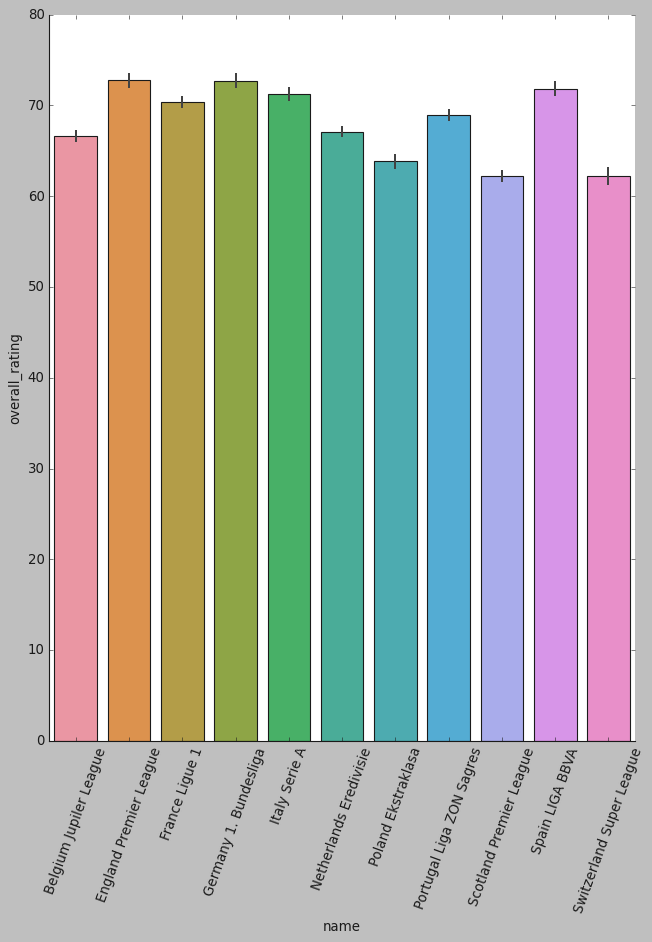

In [40]:
sns.catplot(x="name",y='overall_rating',data=df2, kind="bar",height=10,aspect=0.9).set_xticklabels(rotation=1150);

In [46]:
df2.corr()['overall_rating'].sort_values(ascending=False)

overall_rating            1.000000
potential                 0.859084
standing_tackle           0.786592
reactions                 0.778721
interceptions             0.759080
marking                   0.741048
sliding_tackle            0.729572
heading_accuracy          0.624904
aggression                0.601699
short_passing             0.580958
ball_control              0.543294
long_passing              0.532469
shot_power                0.395731
strength                  0.332088
dribbling                 0.317629
jumping                   0.290641
vision                    0.268273
long_shots                0.266410
curve                     0.257478
stamina                   0.246084
finishing                 0.244819
volleys                   0.236258
penalties                 0.229764
crossing                  0.218152
positioning               0.217996
sprint_speed              0.204334
free_kick_accuracy        0.178699
acceleration              0.133670
agility             

In [47]:
#analiz kısmında object türünde olan verilerden yararlanamadıgımız için bunları çıkartıyoruz.
#dfMatch_copy[genre] adında yeni bir kolon olusturduk.
df_copy = df2.select_dtypes(exclude=['object']).copy()
df_copy['name'] = df2['name']
df_copy= pd.get_dummies(df_copy,columns=['name'])
df_copy.corr()['overall_rating'].sort_values(ascending=False)

overall_rating                   1.000000
potential                        0.859084
standing_tackle                  0.786592
reactions                        0.778721
interceptions                    0.759080
marking                          0.741048
sliding_tackle                   0.729572
heading_accuracy                 0.624904
aggression                       0.601699
short_passing                    0.580958
ball_control                     0.543294
long_passing                     0.532469
shot_power                       0.395731
strength                         0.332088
dribbling                        0.317629
jumping                          0.290641
vision                           0.268273
long_shots                       0.266410
curve                            0.257478
stamina                          0.246084
finishing                        0.244819
volleys                          0.236258
penalties                        0.229764
name_England Premier League      0

In [48]:
dfcor_with_dummy = df_copy.corr()
dfcor_with_dummy

,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,player_api_id,height,...,name_England Premier League,name_France Ligue 1,name_Germany 1. Bundesliga,name_Italy Serie A,name_Netherlands Eredivisie,name_Poland Ekstraklasa,name_Portugal Liga ZON Sagres,name_Scotland Premier League,name_Spain LIGA BBVA,name_Switzerland Super League
buildUpPlaySpeed,1.000000,0.414916,0.445094,0.324233,0.158370,0.401891,0.370143,0.401691,-0.089714,0.055137,...,0.330380,0.098521,0.265676,-0.075651,-0.279074,-0.207627,-0.362739,0.356072,-0.140566,-0.114095
buildUpPlayPassing,0.414916,1.000000,0.255331,0.327562,-0.186969,0.248542,0.453731,0.227775,-0.023386,-0.045007,...,0.110798,0.164625,-0.047275,-0.236205,-0.202342,-0.058394,-0.321885,0.508023,-0.224771,0.143840
chanceCreationPassing,0.445094,0.255331,1.000000,0.402402,0.317255,0.503018,0.371212,0.411833,0.026715,0.032989,...,-0.022799,0.096246,0.202793,-0.386056,-0.334631,-0.046735,0.077792,0.339828,0.009679,0.008430
chanceCreationCrossing,0.324233,0.327562,0.402402,1.000000,0.038396,0.002024,0.121600,-0.039864,-0.080216,0.085039,...,0.306614,0.005300,0.236942,-0.366867,-0.174217,-0.310066,0.067766,0.307631,0.012359,0.261233
chanceCreationShooting,0.158370,-0.186969,0.317255,0.038396,1.000000,0.303959,0.072203,0.248761,0.009784,0.060677,...,-0.171831,-0.196425,0.215954,0.001386,0.057059,0.227563,-0.082622,0.181502,0.205229,-0.128103
defencePressure,0.401891,0.248542,0.503018,0.002024,0.303959,1.000000,0.545197,0.829715,0.002272,0.018002,...,-0.207249,0.131603,0.298078,-0.223934,-0.358349,0.244659,-0.366205,0.161644,0.046725,-0.029224
defenceAggression,0.370143,0.453731,0.371212,0.121600,0.072203,0.545197,1.000000,0.563020,-0.029974,-0.009714,...,0.105568,0.217549,-0.056599,-0.185469,-0.432438,0.248855,-0.437564,0.309857,-0.006710,0.025712
defenceTeamWidth,0.401691,0.227775,0.411833,-0.039864,0.248761,0.829715,0.563020,1.000000,-0.053391,0.019575,...,-0.236838,0.127224,0.189113,0.085926,-0.420476,0.109792,-0.450139,0.261188,0.031855,0.053016
player_api_id,-0.089714,-0.023386,0.026715,-0.080216,0.009784,0.002272,-0.029974,-0.053391,1.000000,0.055411,...,-0.112423,-0.014663,-0.023536,-0.107341,0.044296,0.059820,0.115665,-0.008306,0.014519,0.009805
height,0.055137,-0.045007,0.032989,0.085039,0.060677,0.018002,-0.009714,0.019575,0.055411,1.000000,...,0.101676,-0.095118,0.146553,0.019385,-0.028257,0.056304,0.017962,-0.013969,-0.083613,-0.018012


In [49]:
ilk_cor = dfcor_with_dummy.iloc[11:41,46:57]
ilk_cor

,name_Belgium Jupiler League,name_England Premier League,name_France Ligue 1,name_Germany 1. Bundesliga,name_Italy Serie A,name_Netherlands Eredivisie,name_Poland Ekstraklasa,name_Portugal Liga ZON Sagres,name_Scotland Premier League,name_Spain LIGA BBVA,name_Switzerland Super League
overall_rating,-0.107435,0.225165,0.114393,0.192282,0.146963,-0.075173,-0.188219,0.021020,-0.319864,0.171812,-0.263628
potential,-0.103857,0.170189,0.094744,0.184700,0.111392,-0.046994,-0.204368,0.023341,-0.256573,0.165939,-0.210404
crossing,0.086517,-0.039870,0.124426,-0.000419,-0.063014,0.008072,-0.057058,-0.010850,-0.110189,0.044958,-0.023111
finishing,0.036717,0.049420,0.036498,0.001896,-0.113338,0.049004,0.017795,0.032022,-0.172475,0.049004,0.009708
heading_accuracy,-0.113758,0.226710,0.056314,0.211603,0.090017,-0.065959,-0.179554,-0.011114,-0.158246,0.061211,-0.167664
short_passing,-0.026265,0.068928,0.156486,0.115651,-0.051946,0.028342,-0.130783,-0.045919,-0.190403,0.127186,-0.107464
volleys,0.061213,0.049677,-0.011548,0.023477,-0.058331,0.039039,0.039980,0.023233,-0.183467,-0.001291,0.027113
dribbling,0.001180,0.007802,0.032252,0.011373,-0.039145,0.073282,-0.046783,0.017955,-0.041287,0.006674,-0.043059
curve,0.023188,-0.038174,0.067685,-0.000130,-0.020903,0.033701,-0.063665,0.012587,-0.098433,0.100256,-0.048516
free_kick_accuracy,0.085800,-0.053666,0.015525,0.010656,-0.063602,0.028507,-0.060715,0.038717,-0.128439,0.089219,0.022680


#correlation with dummy and attributes that affect being in the leagues.


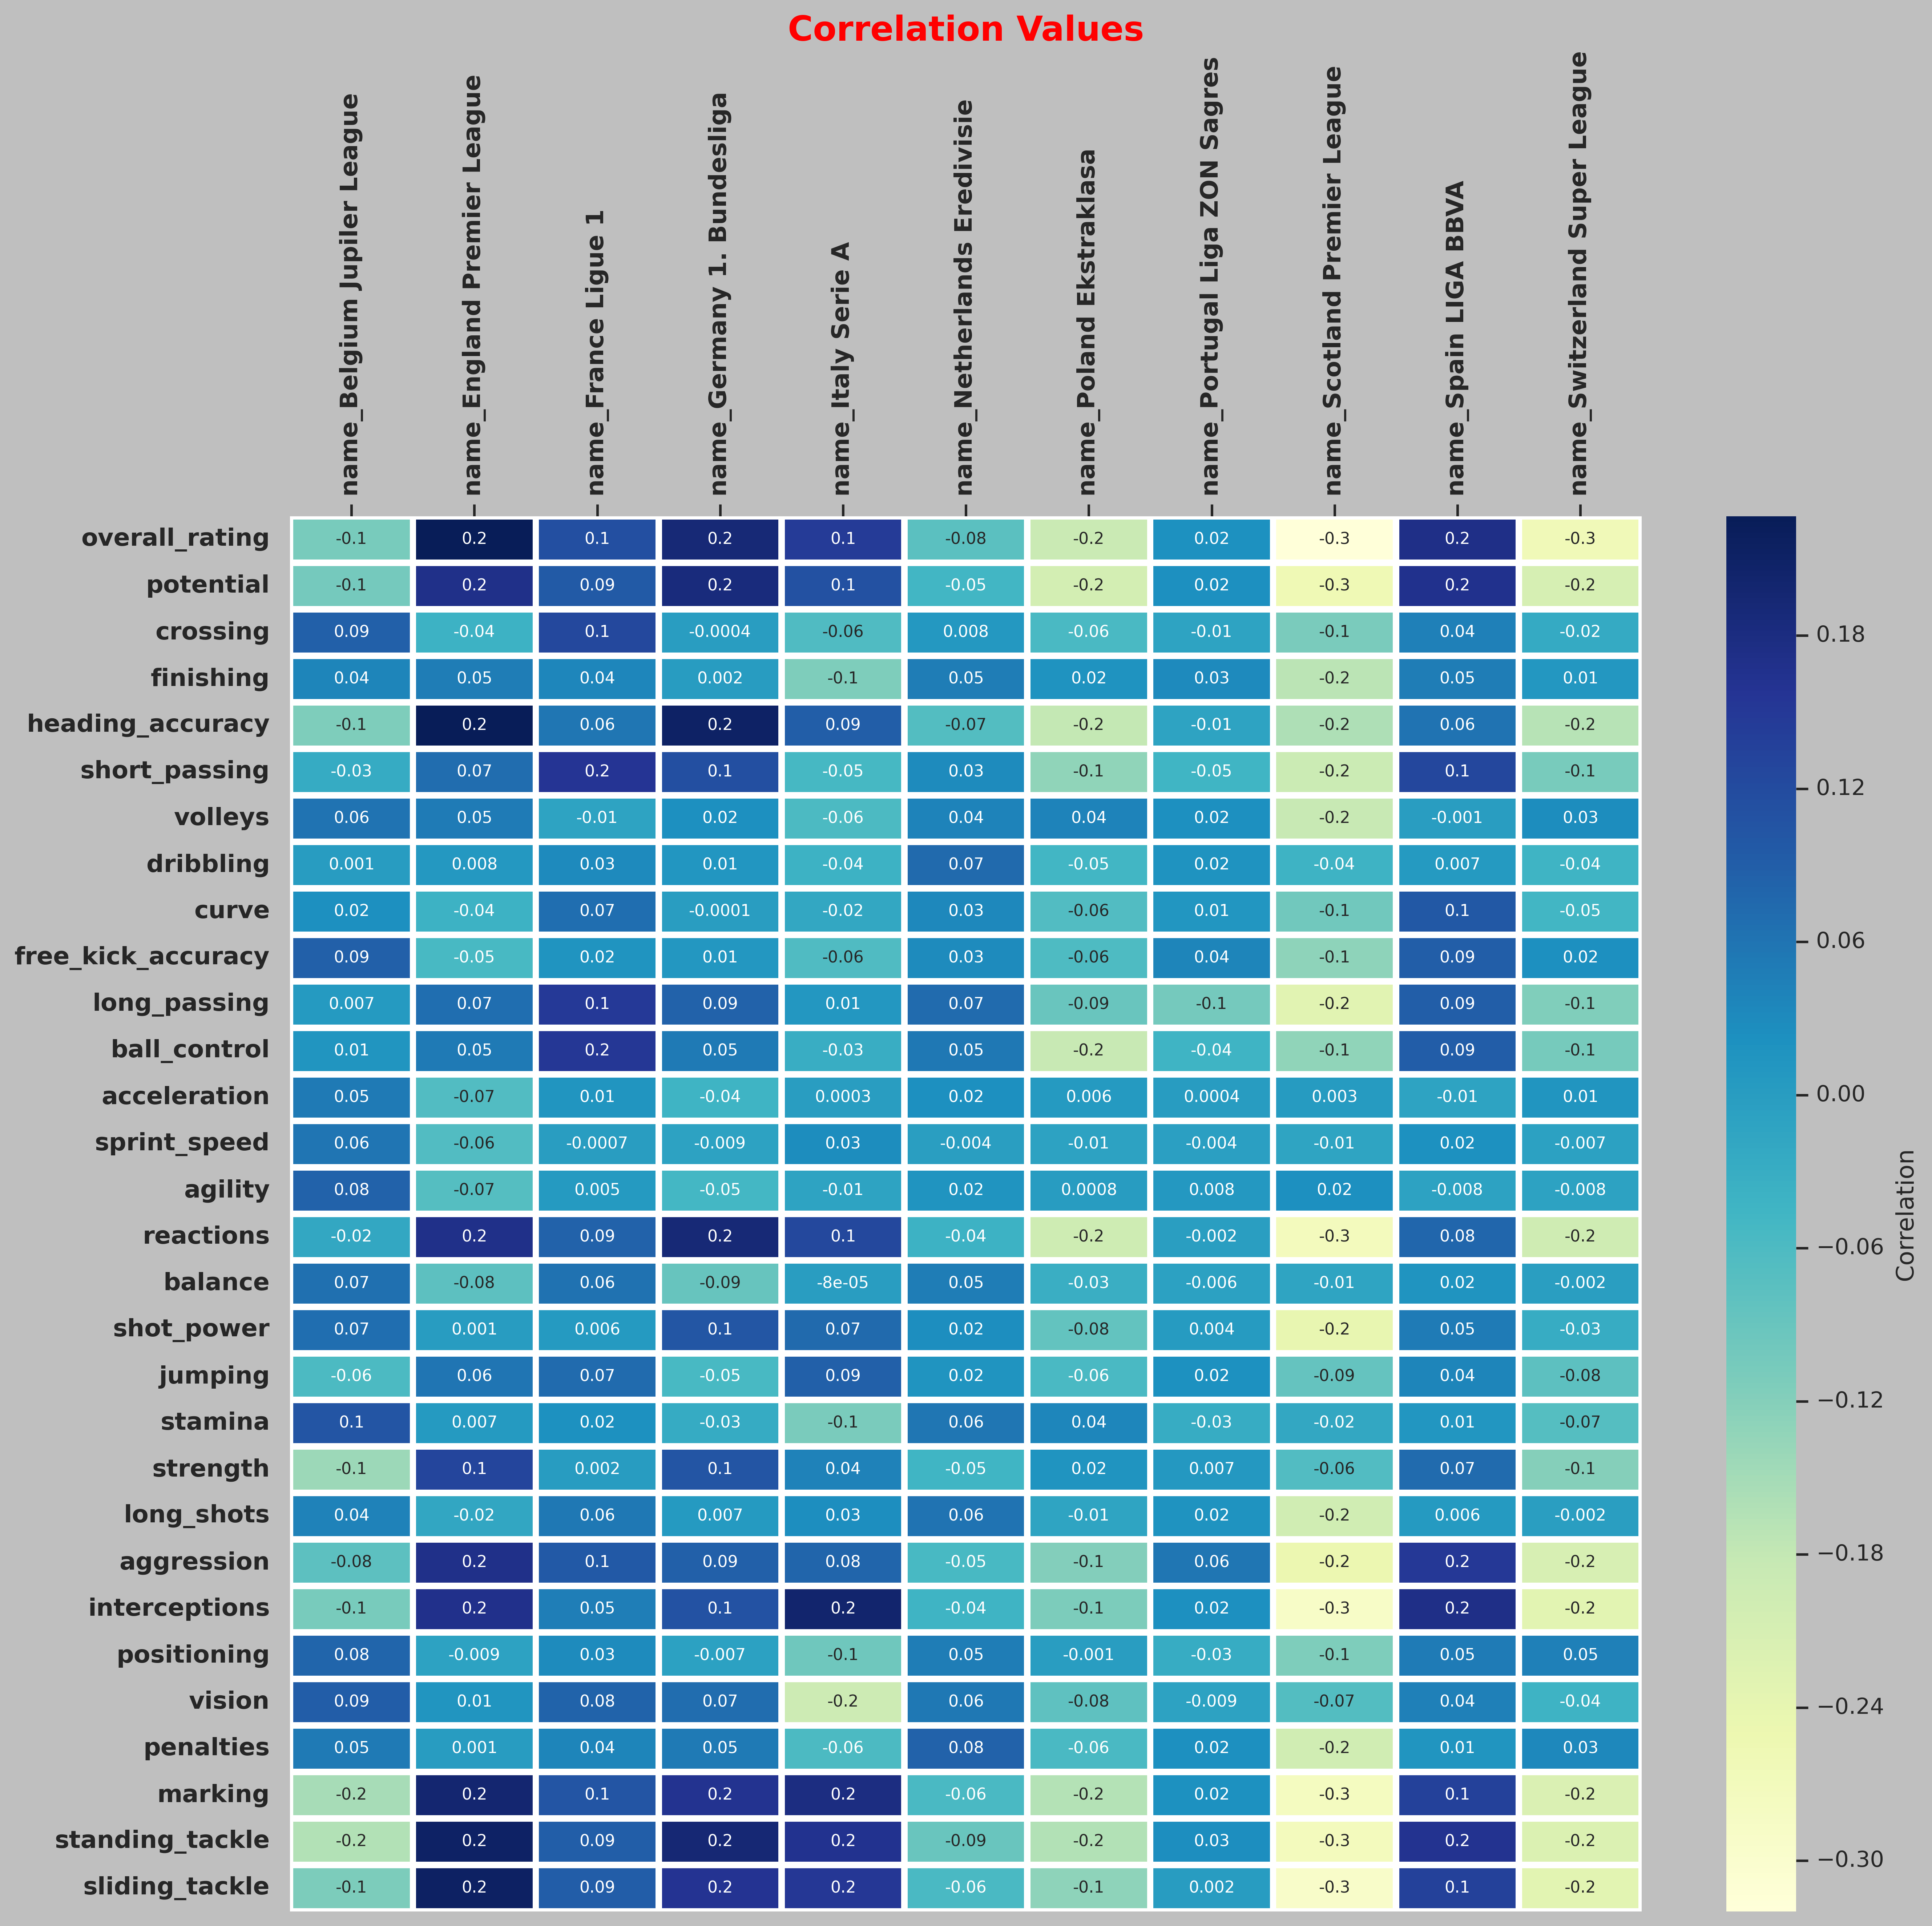

In [51]:
plt.figure(figsize=(15,12),dpi=400),
sns.set(font_scale=1)


sns.heatmap(ilk_cor,annot=True,fmt=".1g" , annot_kws={'size':8} ,  lw=3,cmap="YlGnBu",cbar_kws={'label': 'Correlation',})



plt.style.use('classic')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=90, size="12")
plt.gca().xaxis.tick_top(), plt.xticks(rotation=90,weight="bold",fontsize =12), plt.yticks(rotation=0)
plt.title("Correlation Values",weight="bold",c="red", fontsize=17)

plt.show()

In [15]:
data = [df_stats21]

for dataset in data:
    # extract titles
    dataset['name1'] = dataset['name1'].replace('Belgium Jupiler League', "OTHER_LEAGUES")
    dataset['name1'] = dataset['name1'].replace('England Premier League', 'TOP_5_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('France Ligue 1', 'TOP_5_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('Germany 1. Bundesliga', "TOP_5_LEAGUES")
    dataset['name1'] = dataset['name1'].replace('Portugal Liga ZON Sagres', 'OTHER_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('France Ligue 1', 'TOP_5_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('Italy Serie A', "TOP_5_LEAGUES")
    dataset['name1'] = dataset['name1'].replace('Netherlands Eredivisie', 'OTHER_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('Poland Ekstraklasa', 'OTHER_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('Spain LIGA BBVA', "TOP_5_LEAGUES")
    dataset['name1'] = dataset['name1'].replace('Switzerland Super League', 'OTHER_LEAGUES')
    dataset['name1'] = dataset['name1'].replace('Scotland Premier League', 'OTHER_LEAGUES')

In [16]:
df_stats21

,name,name1,overall_rating,potential,short_passing,long_passing,marking,vision,ball_control,aggression,standing_tackle,shot_power,dribbling,reactions,finishing,heading_accuracy,interceptions
0,Belgium Jupiler League,OTHER_LEAGUES,64.0,64.0,65.0,60.0,64.0,57.0,60.0,72.0,65.0,67.0,50.0,63.0,37.0,65.0,64.0
1,Belgium Jupiler League,OTHER_LEAGUES,64.0,68.0,55.0,56.0,63.0,50.0,56.0,68.0,66.0,60.0,51.0,61.0,46.0,68.0,43.0
2,Belgium Jupiler League,OTHER_LEAGUES,65.0,65.0,57.0,54.0,63.0,53.0,47.0,85.0,64.0,72.0,37.0,64.0,46.0,67.0,59.0
3,Belgium Jupiler League,OTHER_LEAGUES,58.0,62.0,57.0,48.0,56.0,50.0,52.0,59.0,54.0,57.0,54.0,67.0,27.0,43.0,57.0
4,Belgium Jupiler League,OTHER_LEAGUES,72.0,72.0,58.0,54.0,69.0,43.0,48.0,88.0,71.0,79.0,37.0,61.0,47.0,78.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,Switzerland Super League,OTHER_LEAGUES,69.0,69.0,75.0,70.0,56.0,66.0,69.0,78.0,67.0,76.0,64.0,67.0,55.0,61.0,73.0
2605,Switzerland Super League,OTHER_LEAGUES,52.0,57.0,31.0,30.0,46.0,31.0,30.0,47.0,66.0,38.0,24.0,50.0,27.0,61.0,51.0
2606,Switzerland Super League,OTHER_LEAGUES,61.0,65.0,57.0,47.0,65.0,46.0,63.0,68.0,65.0,29.0,49.0,58.0,20.0,61.0,55.0
2607,Switzerland Super League,OTHER_LEAGUES,82.0,86.0,81.0,78.0,85.0,75.0,80.0,79.0,83.0,78.0,78.0,85.0,59.0,74.0,84.0


In [17]:
df_stats21.drop('name',axis=1,inplace=True)

In [18]:
df_stats1_dummy2 = pd.get_dummies(df_stats21,columns=['name1'])


In [19]:
df_stats22 = df_stats21.select_dtypes(exclude=['object']).copy()
df_stats22['name1'] = df_stats21['name1']
df_stats22= pd.get_dummies(df_stats22,columns=['name1'])


In [20]:
df_stats22

,overall_rating,potential,short_passing,long_passing,marking,vision,ball_control,aggression,standing_tackle,shot_power,dribbling,reactions,finishing,heading_accuracy,interceptions,name1_OTHER_LEAGUES,name1_TOP_5_LEAGUES
0,64.0,64.0,65.0,60.0,64.0,57.0,60.0,72.0,65.0,67.0,50.0,63.0,37.0,65.0,64.0,1,0
1,64.0,68.0,55.0,56.0,63.0,50.0,56.0,68.0,66.0,60.0,51.0,61.0,46.0,68.0,43.0,1,0
2,65.0,65.0,57.0,54.0,63.0,53.0,47.0,85.0,64.0,72.0,37.0,64.0,46.0,67.0,59.0,1,0
3,58.0,62.0,57.0,48.0,56.0,50.0,52.0,59.0,54.0,57.0,54.0,67.0,27.0,43.0,57.0,1,0
4,72.0,72.0,58.0,54.0,69.0,43.0,48.0,88.0,71.0,79.0,37.0,61.0,47.0,78.0,75.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,69.0,69.0,75.0,70.0,56.0,66.0,69.0,78.0,67.0,76.0,64.0,67.0,55.0,61.0,73.0,1,0
2605,52.0,57.0,31.0,30.0,46.0,31.0,30.0,47.0,66.0,38.0,24.0,50.0,27.0,61.0,51.0,1,0
2606,61.0,65.0,57.0,47.0,65.0,46.0,63.0,68.0,65.0,29.0,49.0,58.0,20.0,61.0,55.0,1,0
2607,82.0,86.0,81.0,78.0,85.0,75.0,80.0,79.0,83.0,78.0,78.0,85.0,59.0,74.0,84.0,1,0


In [135]:
df_stats22.drop('name1_OTHER_LEAGUES',axis=1,inplace=True)

In [28]:
a=df_stats11["potential"].max()
print('\nPotential_Max:',a)
b=df_stats11["potential"].min()
print('\nPotential_Min:',b)
c=df_stats11["potential"].mean()
print('\nPotential_Mean:',c)


Potential_Max: 89.0

Potential_Min: 54.0

Potential_Mean: 70.82215408202376


In [136]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['potential'] <= 63, 'potential'] = 0
    dataset.loc[(dataset['potential'] > 63) & (dataset['potential'] <= 78), 'potential'] = 1
    dataset.loc[(dataset['potential'] > 78) & (dataset['potential'] <= 89), 'potential'] = 2

In [137]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['overall_rating'] <= 63, 'overall_rating'] = 0
    dataset.loc[(dataset['overall_rating'] > 63) & (dataset['overall_rating'] <= 78), 'overall_rating'] = 1
    dataset.loc[(dataset['overall_rating'] > 78) & (dataset['overall_rating'] <= 89), 'overall_rating'] = 2

In [138]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['short_passing'] <= 55, 'short_passing'] = 0
    dataset.loc[(dataset['short_passing'] > 55) & (dataset['short_passing'] <= 77), 'short_passing'] = 1
    dataset.loc[(dataset['short_passing'] > 77) & (dataset['short_passing'] <= 90), 'short_passing'] = 2

In [139]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['long_passing'] <= 45, 'long_passing'] = 0
    dataset.loc[(dataset['long_passing'] > 45) & (dataset['long_passing'] <= 77), 'long_passing'] = 1
    dataset.loc[(dataset['long_passing'] > 77) & (dataset['long_passing'] <= 86), 'long_passing'] = 2

In [140]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['aggression'] <= 55, 'aggression'] = 0
    dataset.loc[(dataset['aggression'] > 55) & (dataset['aggression'] <= 79), 'aggression'] = 1
    dataset.loc[(dataset['aggression'] > 79) & (dataset['aggression'] <= 95), 'aggression'] = 2

In [141]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['standing_tackle'] <=45, 'standing_tackle'] = 0
    dataset.loc[(dataset['standing_tackle'] > 45) & (dataset['standing_tackle'] <= 77), 'standing_tackle'] = 1
    dataset.loc[(dataset['standing_tackle'] > 77) & (dataset['standing_tackle'] <= 92), 'standing_tackle'] = 2

In [142]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['marking'] <= 55, 'marking'] = 0
    dataset.loc[(dataset['marking'] > 55) & (dataset['marking'] <= 77), 'marking'] = 1
    dataset.loc[(dataset['marking'] > 77) & (dataset['marking'] <= 91), 'marking'] = 2

In [143]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['ball_control'] <= 45, 'ball_control'] = 0
    dataset.loc[(dataset['ball_control'] > 45) & (dataset['ball_control'] <=77 ), 'ball_control'] = 1
    dataset.loc[(dataset['ball_control'] > 77) & (dataset['ball_control'] <= 88), 'ball_control'] = 2

In [144]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['shot_power'] <= 45, 'shot_power'] = 0
    dataset.loc[(dataset['shot_power'] > 45) & (dataset['shot_power'] <=79 ), 'shot_power'] = 1
    dataset.loc[(dataset['shot_power'] > 79) & (dataset['shot_power'] <= 95), 'shot_power'] = 2

In [145]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['dribbling'] <= 45, 'dribbling'] = 0
    dataset.loc[(dataset['dribbling'] > 45) & (dataset['dribbling'] <=75 ), 'dribbling'] = 1
    dataset.loc[(dataset['dribbling'] > 76) & (dataset['dribbling'] <=85), 'dribbling'] = 2

In [146]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['reactions'] <= 50, 'reactions'] = 0
    dataset.loc[(dataset['reactions'] > 50) & (dataset['reactions'] <=76 ), 'reactions'] = 1
    dataset.loc[(dataset['reactions'] > 76) & (dataset['reactions'] <= 89), 'reactions'] = 2

In [147]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['heading_accuracy'] <= 50, 'heading_accuracy'] = 0
    dataset.loc[(dataset['heading_accuracy'] > 50) & (dataset['heading_accuracy'] <=76 ), 'heading_accuracy'] = 1
    dataset.loc[(dataset['heading_accuracy'] > 76) & (dataset['heading_accuracy'] <= 93), 'heading_accuracy'] = 2

In [148]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['interceptions'] <= 45, 'interceptions'] = 0
    dataset.loc[(dataset['interceptions'] > 45) & (dataset['interceptions'] <=75 ), 'interceptions'] = 1
    dataset.loc[(dataset['interceptions'] > 76) & (dataset['interceptions'] <= 96), 'interceptions'] = 2

In [149]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['vision'] <= 46, 'vision'] = 0
    dataset.loc[(dataset['vision'] > 46) & (dataset['vision'] <=76 ), 'vision'] = 1
    dataset.loc[(dataset['vision'] > 77) & (dataset['vision'] <= 86), 'vision'] = 2

In [150]:
data = [df_stats22]

for dataset in data:
    dataset.loc[ dataset['finishing'] <= 45, 'finishing'] = 0
    dataset.loc[(dataset['finishing'] > 45) & (dataset['finishing'] <=77 ), 'finishing'] = 1
    dataset.loc[(dataset['finishing'] > 77) & (dataset['finishing'] <= 90), 'finishing'] = 2

In [151]:
df_stats22

,overall_rating,potential,short_passing,long_passing,marking,vision,ball_control,aggression,standing_tackle,shot_power,dribbling,reactions,finishing,heading_accuracy,interceptions,name1_TOP_5_LEAGUES
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
2606,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0
2607,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,0


In [48]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
X_train = df_stats22.drop("name1_TOP_5_LEAGUES", axis=1)
y_train = df_stats22["name1_TOP_5_LEAGUES"]
X_test  = df_stats22.drop("overall_rating", axis=1).copy()

In [153]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [154]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    

In [156]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [157]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [158]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [159]:
perceptron = Perceptron(max_iter=200)
perceptron.fit(X_train, y_train)


Y_pred = perceptron.predict(X_test)


acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

In [160]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

G:\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [161]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [162]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
77.27,Random Forest
77.27,Decision Tree
73.02,KNN
68.72,Logistic Regression
67.34,Support Vector Machines
65.81,Perceptron
64.81,Naive Bayes
58.07,Stochastic Gradient Decent


In [163]:
df_stats11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall_rating    2609 non-null   float64
 1   potential         2609 non-null   float64
 2   short_passing     2609 non-null   float64
 3   long_passing      2609 non-null   float64
 4   marking           2609 non-null   float64
 5   vision            2609 non-null   float64
 6   ball_control      2609 non-null   float64
 7   aggression        2609 non-null   float64
 8   standing_tackle   2609 non-null   float64
 9   shot_power        2609 non-null   float64
 10  dribbling         2609 non-null   float64
 11  reactions         2609 non-null   float64
 12  finishing         2609 non-null   float64
 13  heading_accuracy  2609 non-null   float64
 14  interceptions     2609 non-null   float64
 15  name1_T5          2609 non-null   uint8  
dtypes: float64(15), uint8(1)
memory usage: 308

In [165]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
overall_rating,0.145
standing_tackle,0.093
interceptions,0.089
heading_accuracy,0.087
marking,0.074
aggression,0.067
potential,0.064
dribbling,0.063
shot_power,0.061


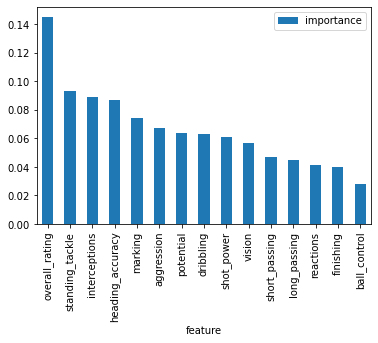

In [166]:
importances.plot.bar()


In [167]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=400, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)



acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

70.79 %
oob score: 67.92 %


In [168]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[856, 471],
       [464, 818]], dtype=int64)

In [44]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[856, 471],
       [464, 818]], dtype=int64)

In [169]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.6363282769350447

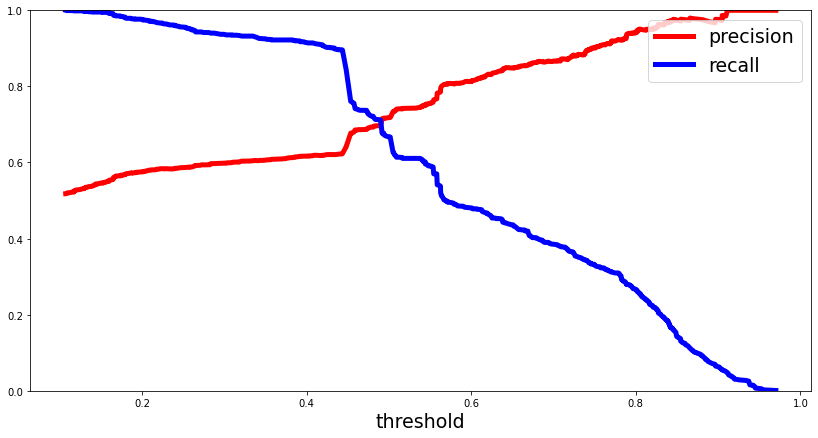

In [170]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

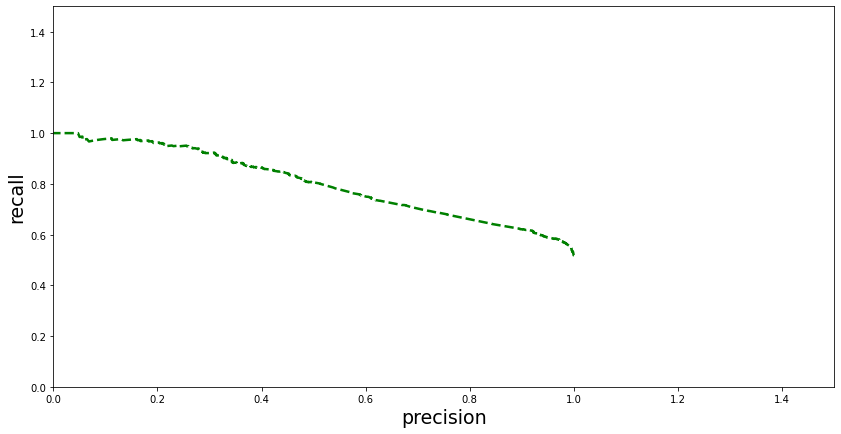

In [171]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

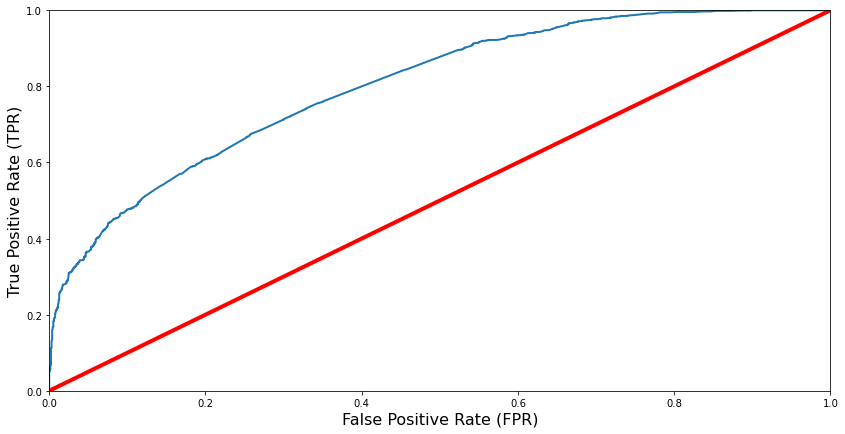

In [173]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [172]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)


ROC-AUC-Score: 0.8009212832718283
